In [10]:
# Importing all the library I need
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [11]:
# Load the dataset
df = pd.read_csv('owid-covid-data.csv')

In [12]:
# Check column names
print(df.columns)

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [13]:
# Priview rows
print(df.head())

  iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  05/01/2020          NaN        0.0   
1      AFG      Asia  Afghanistan  06/01/2020          NaN        0.0   
2      AFG      Asia  Afghanistan  07/01/2020          NaN        0.0   
3      AFG      Asia  Afghanistan  08/01/2020          NaN        0.0   
4      AFG      Asia  Afghanistan  09/01/2020          NaN        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         0.0                  NaN  ...   
1                 NaN           NaN         0.0                  NaN  ...   
2                 NaN           NaN         0.0                  NaN  ...   
3                 NaN           NaN         0.0                  NaN  ...   
4                 NaN           NaN         0.0                  NaN  ...   

   male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0           NaN            

In [14]:
# Check for missing values
print(df.isnull().sum())

iso_code                                        0
continent                                   19015
location                                        0
date                                            0
total_cases                                 38963
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       384295
excess_mortality_cumulative                384295
excess_mortality                           384295
excess_mortality_cumulative_per_million    384295
Length: 67, dtype: int64


In [15]:
# Filter for selected countries
countries = ['Kenya', 'Tanzania', 'Uganda', 'Rwanda', 'Burundi']
df_EA = df[df['location'].isin(countries)]

In [24]:
# Drop rows with missing date
df_EA = df[df['location'].isin(['Kenya', 'Tanzania', 'Uganda', 'Rwanda', 'Burundi'])].copy()
df_EA.dropna(subset=['date', 'total_cases'], inplace=True)

In [32]:
# Convert date column to datetime
df_EA['date'] = pd.to_datetime(df_EA['date'], dayfirst=True)

In [26]:
# Fill numeric missing values with interpolation
df_EA.interpolate(method='linear', inplace=True)

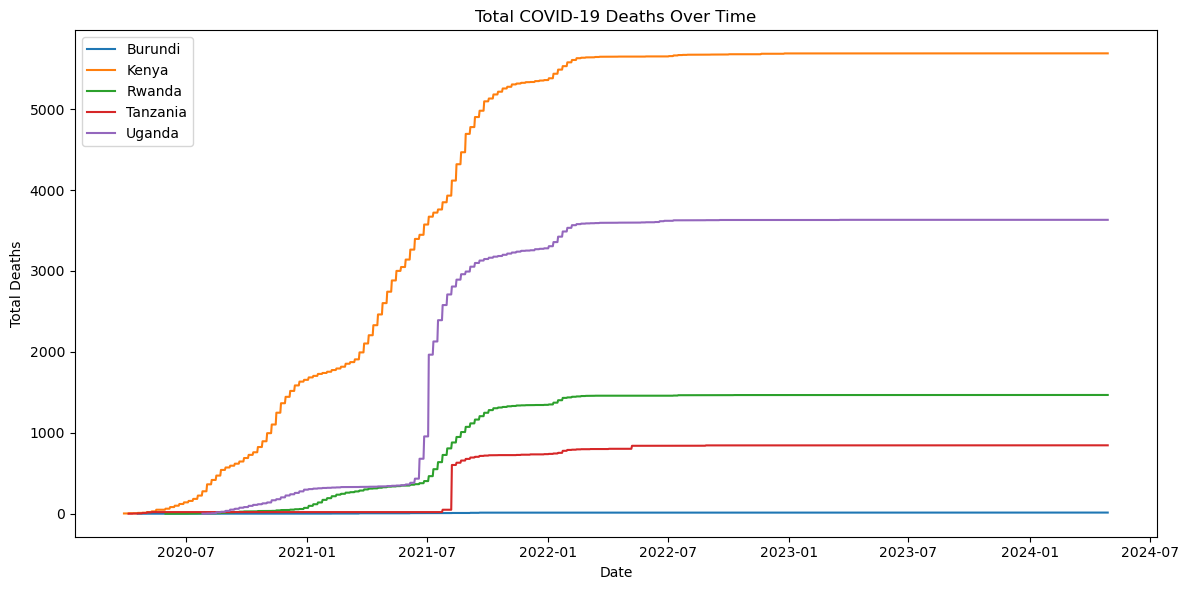

In [34]:
#  Total cases over time for selected countries.
countries = ['Kenya', 'Tanzania', 'Uganda', 'Rwanda', 'Burundi']
df_EA = df[df['location'].isin(countries)].copy()
df_EA['date'] = pd.to_datetime(df_EA['date'], dayfirst=True)

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_EA, x='date', y='total_deaths', hue='location')
plt.title("Total COVID-19 Deaths Over Time")
plt.xlabel("Date")
plt.ylabel("Total Deaths")
plt.legend()
plt.tight_layout()
plt.show()

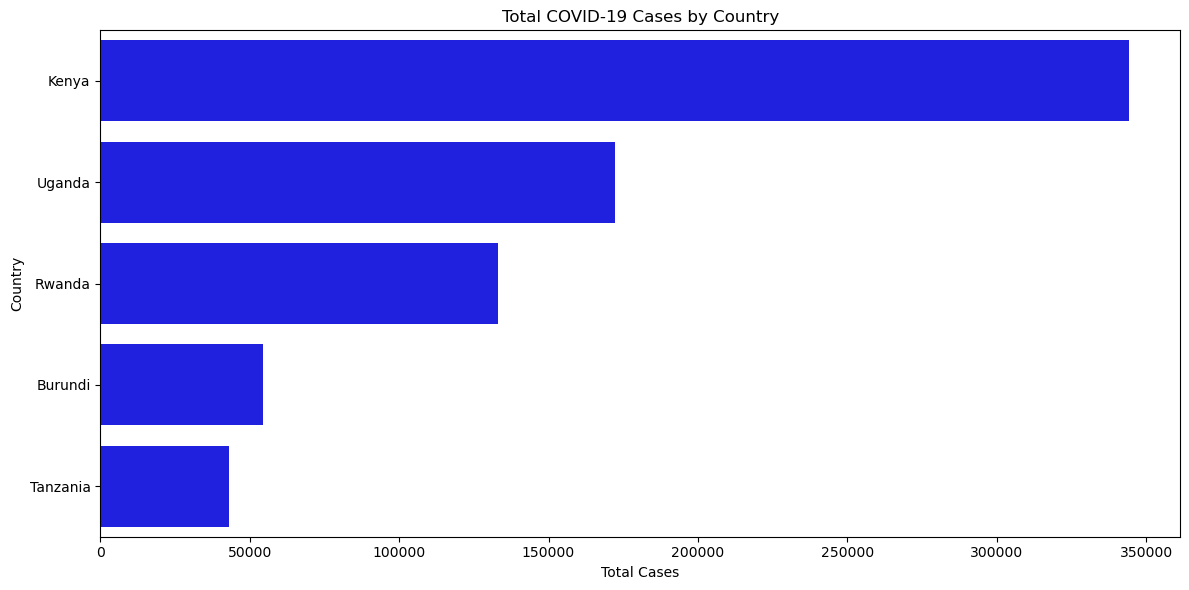

In [41]:
# Top Countries by Total Cases.
top_countries = latest_data.sort_values('total_cases', ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x='total_cases', y='location', data=top_countries, color='blue')
plt.title("Total COVID-19 Cases by Country")
plt.xlabel("Total Cases")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

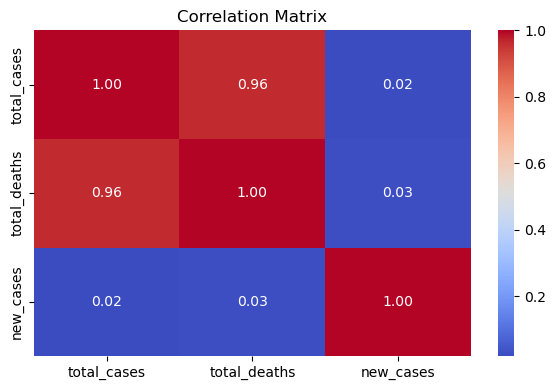

In [42]:
# Correlation analysis
corr_data = df_EA[['total_cases', 'total_deaths', 'new_cases']].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr_data, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()


In [43]:
# Death rate: total_deaths / total_cases
df_EA['death_rate'] = df_EA['total_deaths'] / df_EA['total_cases']

In [44]:
# Average death rate per country
death_rate_avg = df_EA.groupby('location')['death_rate'].mean().sort_values(ascending=False)
print("Average Death Rate:\n", death_rate_avg)

Average Death Rate:
 location
Tanzania    0.028263
Kenya       0.019207
Uganda      0.018932
Rwanda      0.010670
Burundi     0.002931
Name: death_rate, dtype: float64


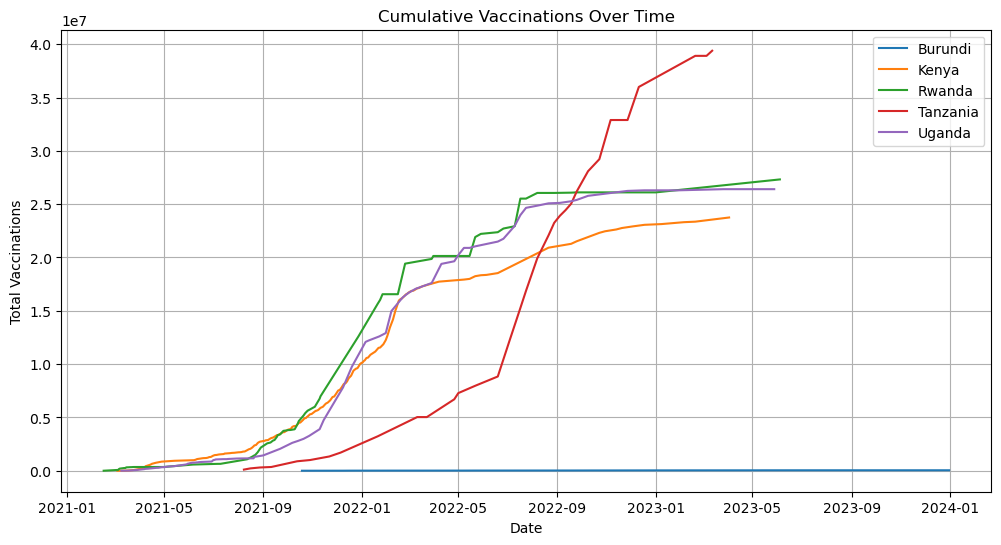

In [45]:
#  Cumulative vaccinations over time for selected countries.
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_EA, x='date', y='total_vaccinations', hue='location')
plt.title("Cumulative Vaccinations Over Time")
plt.xlabel("Date")
plt.ylabel("Total Vaccinations")
plt.legend()
plt.grid(True)
plt.show()

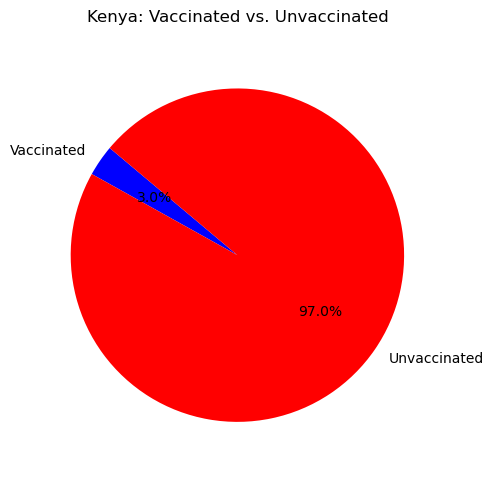

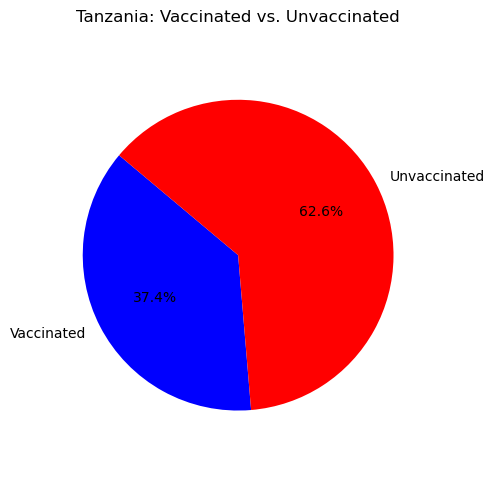

In [47]:
# Vaccinated vs. unvaccinated
countries = ['Kenya', 'Tanzania']

for country in countries:
    country_df = df[df['location'] == country].copy()
    latest = country_df.sort_values('date').dropna(subset=['people_fully_vaccinated']).iloc[-1]

    vaccinated = latest['people_fully_vaccinated']
    population = latest['population']
    unvaccinated = population - vaccinated

    labels = ['Vaccinated', 'Unvaccinated']
    sizes = [vaccinated, unvaccinated]
    colors = ['blue', 'red']

    plt.figure(figsize=(5, 5))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
    plt.title(f'{country}: Vaccinated vs. Unvaccinated')
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

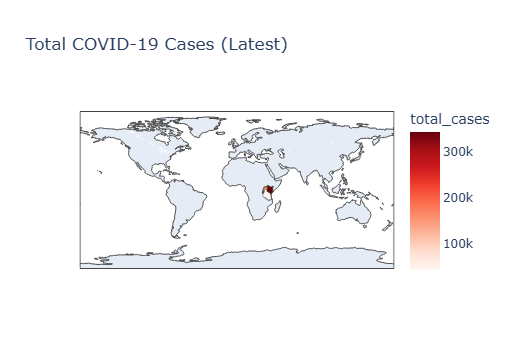

In [51]:
# Get the latest data per country
latest_data = df_EA.sort_values('date').groupby('location').tail(1)

# Create choropleth
fig = px.choropleth(latest_data,
                    locations='location',
                    locationmode='country names',
                    color='total_cases',
                    hover_name='location',
                    title='Total COVID-19 Cases (Latest)',
                    color_continuous_scale='Reds')
fig.show()


In [ ]:
Insights:
Kenya and Uganda had the highest total case counts among the five.

Burudi had the lowest number of total reported cases and vaccinations.

Tanzania showed a sharp drop in data after early 2021, indicating a gap in reporting.

Death rates were generally low across the region, possibly reflecting underreporting or young population.

Tanzania has the higher number of fully vaccinated people.